In [ ]:
# Package Yang Di perlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Memuat dataset
wine = pd.read_csv('/content/drive/MyDrive/ML/winequality-red.csv')

In [ ]:
#Mari kita periksa bagaimana data didistribusikan
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Mari kita lakukan perencanaan untuk mengetahui bagaimana kolom data didistribusikan dalam kumpulan data

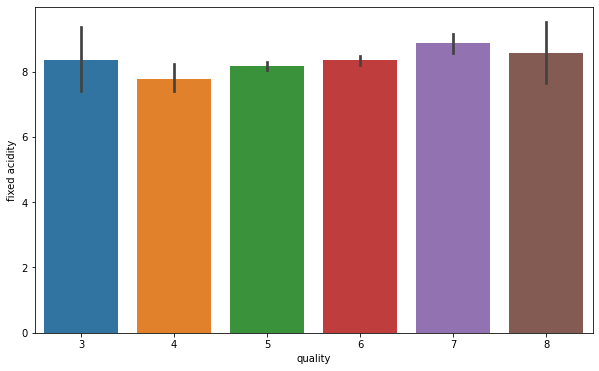

In [ ]:
#Di sini kita melihat bahwa keasaman tetap tidak memberikan spesifikasi apa pun untuk mengklasifikasikan kualitas.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

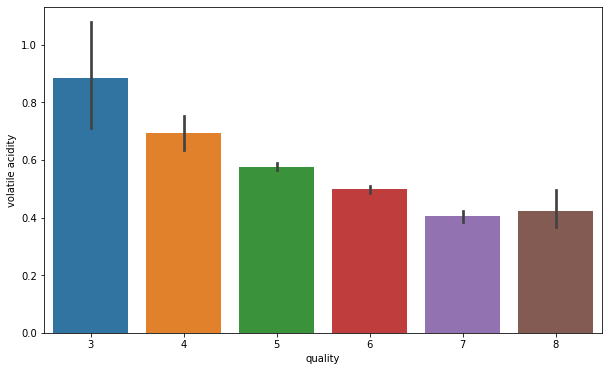

In [ ]:
#Di sini kita melihat bahwa ini adalah tren penurunan keasaman yang mudah menguap saat kita meningkatkan kualitasnya
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

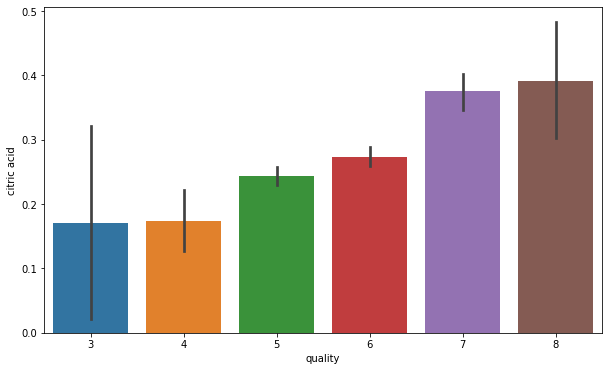

In [ ]:
#Komposisi asam sitrat menjadi lebih tinggi saat kita meningkatkan kualitas anggur
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

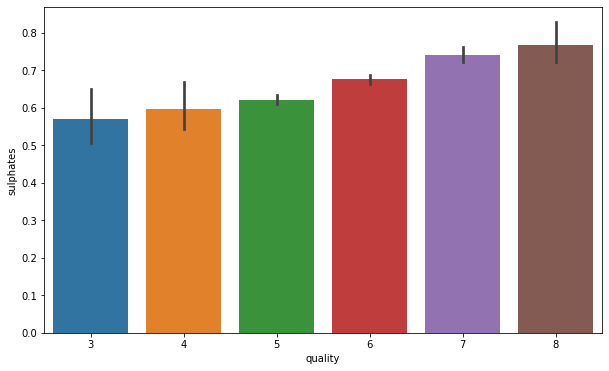

In [ ]:
#Sulfat semakin tinggi dengan kualitas anggur
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

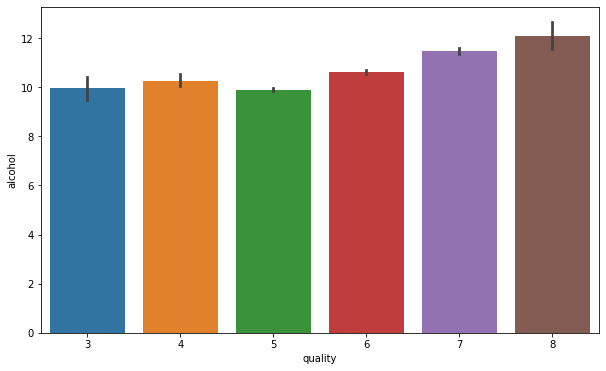

In [ ]:
#Tingkat Alkohol juga semakin tinggi seiring dengan meningkatnya kualitas anggur
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

Mempersiapkan Data untuk menjalankan algoritme Machine learning

In [ ]:
#Membuat klasifikasi biner untuk merespon variabel.

#Membagi Jenis wine menjadi good dan bad dengan memberikan batasan pada kualitasnya

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [ ]:
#Sekarang mari kita beri label ke variabel kualitas yang tadi kita buat

label_quality = LabelEncoder()

In [ ]:
#Bad menjadi 0 and good menjadi 1 

wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
#Melakukan Perhitungan dengan Mengkategorikan kualitas bad(0) dan good(1)
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


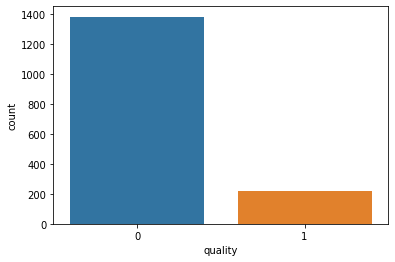

In [ ]:
#Melihati hasil dari value_counts dalam bentuk diagram
sns.countplot(wine['quality'])

In [ ]:
#Sekarang pisahkan dataset sebagai variabel respons dan variabel fitur

X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
#Latih dan Uji pemisahan data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Menerapkan penskalaan Standar untuk mendapatkan hasil yang dioptimalkan

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Our training and testing data is ready now to perform machine learning algorithm

Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
#Mari kita lihat bagaimana kinerja model kita

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.72      0.38      0.50        47

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.87       320



Random forest gives the accuracy of 86%